In [51]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import requests
import gmaps
import json
import os

plt.style.use("seaborn")

In [8]:
rent_df = pd.read_csv("rent20-22.csv", index_col=0)
rent_df.columns

Index(['state', 'county', 'county name', 'state initial', 'studio_2020',
       'studio_2021', 'studio_2022', 'bedroom_1_2020', 'bedroom_1_2021',
       'bedroom_1_2022', 'bedroom_2_2020', 'bedroom_2_2021', 'bedroom_2_2022',
       'bedroom_3_2020', 'bedroom_3_2021', 'bedroom_3_2022', 'bedroom_4_2020',
       'bedroom_4_2021', 'bedroom_4_2022', 'pop2017'],
      dtype='object')

In [10]:
rent_df

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
0,48,59,Callahan County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,13660
1,48,253,Jones County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,19970
2,48,441,Taylor County,TX,673,761.0,715.0,699,789.0,760.0,920,1028.0,981.0,1209,1383.0,1337.0,1560,1764.0,1658.0,135370
3,72,3,Aguada Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,39470
4,72,5,Aguadilla Municipio,PR,386,401.0,407.0,397,414.0,423.0,452,472.0,486.0,591,602.0,604.0,713,720.0,711.0,55720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4764,72,133,Santa Isabel Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,22475
4765,72,147,Vieques Municipio,PR,370,386.0,389.0,373,395.0,396.0,437,450.0,451.0,582,599.0,614.0,656,666.0,674.0,8930
4766,78,10,St. Croix,VI,887,926.0,964.0,905,945.0,984.0,1105,1154.0,1201.0,1377,1435.0,1485.0,1497,1565.0,1629.0,53234
4767,78,20,St. John,VI,1177,1230.0,1280.0,1394,1458.0,1517.0,1733,1812.0,1885.0,2160,2254.0,2330.0,2348,2457.0,2556.0,4197


In [21]:
rent_ga = rent_df[rent_df["state"] == 13]
rent_ga

,state,county,county name,state initial,studio_2020,studio_2021,studio_2022,bedroom_1_2020,bedroom_1_2021,bedroom_1_2022,bedroom_2_2020,bedroom_2_2021,bedroom_2_2022,bedroom_3_2020,bedroom_3_2021,bedroom_3_2022,bedroom_4_2020,bedroom_4_2021,bedroom_4_2022,pop2017
14,13,7,Baker County,GA,643,668.0,562.0,666,690.0,581.0,791,814.0,704.0,1031,1054.0,887.0,1151,1215.0,1036.0,3250
15,13,95,Dougherty County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,91520
16,13,177,Lee County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,29215
17,13,273,Terrell County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,8980
18,13,321,Worth County,GA,643,668.0,711.0,666,690.0,737.0,791,814.0,865.0,1031,1054.0,1121.0,1151,1215.0,1359.0,20810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,13,309,Wheeler County,GA,513,507.0,545.0,516,510.0,549.0,651,648.0,704.0,939,927.0,870.0,998,975.0,955.0,7950
2296,13,311,White County,GA,602,619.0,693.0,606,623.0,698.0,764,763.0,827.0,1010,1006.0,1052.0,1035,1035.0,1121.0,28510
2297,13,315,Wilcox County,GA,513,507.0,545.0,516,510.0,549.0,651,648.0,704.0,811,865.0,1000.0,998,975.0,1036.0,8895
2298,13,317,Wilkes County,GA,557,558.0,592.0,560,562.0,596.0,738,740.0,784.0,939,975.0,1035.0,1132,1114.0,1154.0,9905


In [38]:
bedroom_amount = ["studio_2020", "bedroom_1_2020", "bedroom_2_2020", "bedroom_3_2020", "bedroom_4_2020"]
bedroom_quantile = []
for room in bedroom_amount:
    bedroom = rent_ga.loc[:, room]
    #quartiles = bedroom.quantile([.25, .5, .75])
    bedroom_quantile.append(bedroom.quantile([.25, .5, .75]))

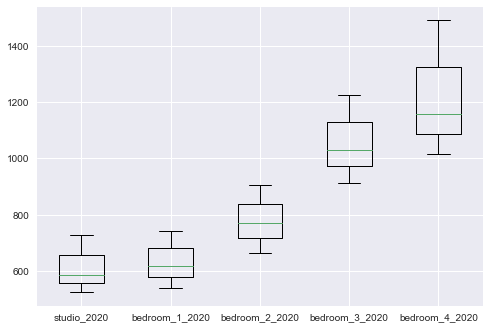

In [52]:
x_axis = np.arange(len(bedroom_amount))
tick_locations = [value + 1 for value in x_axis]
fig1, ax1 = plt.subplots()
#ax1.set_ylabel("")
ax1.boxplot(bedroom_quantile, sym = 'b')
plt.xticks(tick_locations, bedroom_amount)
plt.show()

In [41]:
#try limiting the y axis next time before doing this. if it doesnt work just keep this in
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [43]:
rent_ga = remove_outliers(rent_ga, ["pop2017"], 4)

Working on column: pop2017


R value: 0.5704928087182803


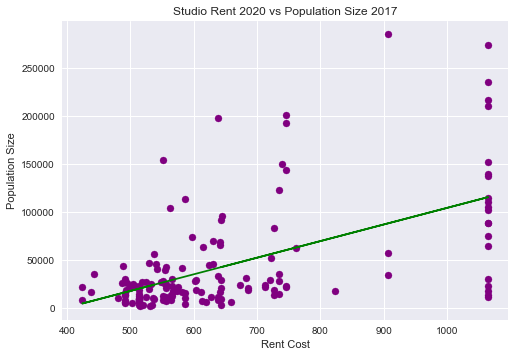

In [61]:
r = np.corrcoef(rent_ga["studio_2020"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["studio_2020"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["studio_2020"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["studio_2020"], (m * rent_ga["studio_2020"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.title("Studio Rent 2020 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5954427083894882


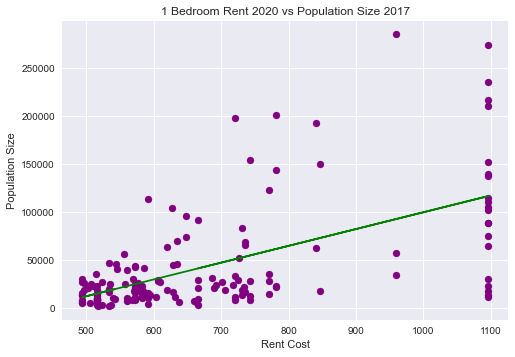

In [62]:
r = np.corrcoef(rent_ga["bedroom_1_2020"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_1_2020"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_1_2020"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_1_2020"], (m * rent_ga["bedroom_1_2020"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.title("1 Bedroom Rent 2020 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5946832813250422


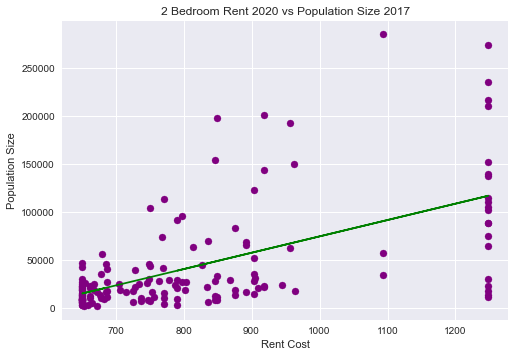

In [64]:
r = np.corrcoef(rent_ga["bedroom_2_2020"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_2_2020"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_2_2020"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_2_2020"], (m * rent_ga["bedroom_2_2020"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.title("2 Bedroom Rent 2020 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5955385267940493


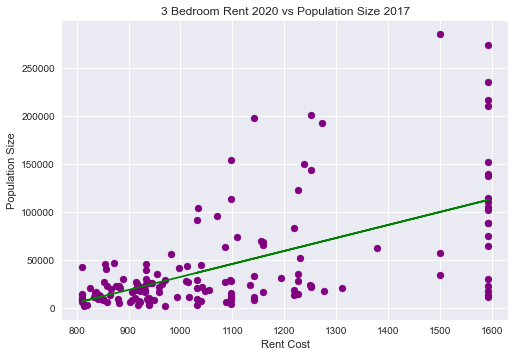

In [65]:
r = np.corrcoef(rent_ga["bedroom_3_2020"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_3_2020"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_3_2020"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_3_2020"], (m * rent_ga["bedroom_3_2020"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.title("3 Bedroom Rent 2020 vs Population Size 2017")
plt.grid(True)
plt.show()

R value: 0.5818073397781195


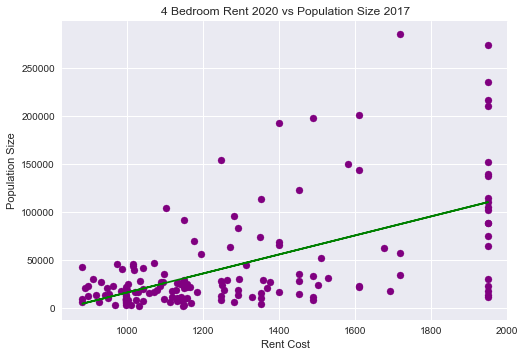

In [66]:
r = np.corrcoef(rent_ga["bedroom_4_2020"], rent_ga["pop2017"])
m, b = np.polyfit(rent_ga["bedroom_4_2020"], rent_ga["pop2017"], 1)
print(f"R value: {r[0][1]}")

plt.scatter(rent_ga["bedroom_4_2020"], rent_ga["pop2017"], color = "purple")
plt.plot(rent_ga["bedroom_4_2020"], (m * rent_ga["bedroom_4_2020"]) + b, color = "green")

plt.xlabel("Rent Cost")
plt.ylabel("Population Size")
plt.title("4 Bedroom Rent 2020 vs Population Size 2017")
plt.grid(True)
plt.show()